In [1]:
import glob
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

for npy_file in glob.glob('../output/sed_result/0110_121231/*.npy'):
    framewise_output = np.load(npy_file)
    filename = os.path.split(npy_file)[1]
    recording_id = filename[:9]
    prelabeled_species_id = int(filename[10:-4])
    break

In [2]:
recording_id

'1520a52ef'

In [3]:
prelabeled_species_id

13

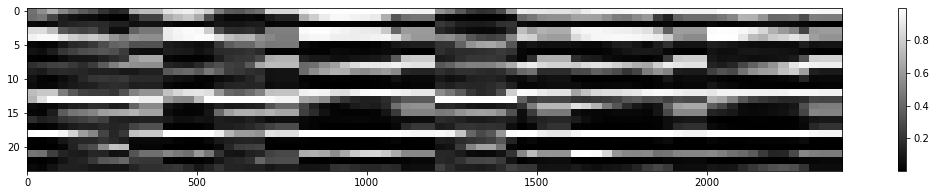

In [4]:
plt.figure(figsize=(20,3))
plt.imshow(framewise_output.T, aspect=20, cmap="gray")
plt.colorbar()
plt.show()

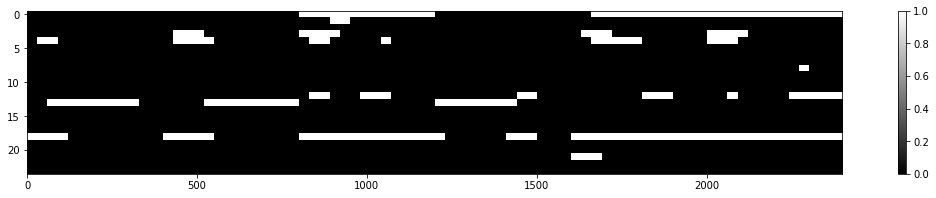

In [5]:
threshold = 0.95
thresholded = (framewise_output > threshold) * 1
plt.figure(figsize=(20,3))
plt.imshow(thresholded.T, aspect=20, cmap="gray")
plt.colorbar()
plt.show()

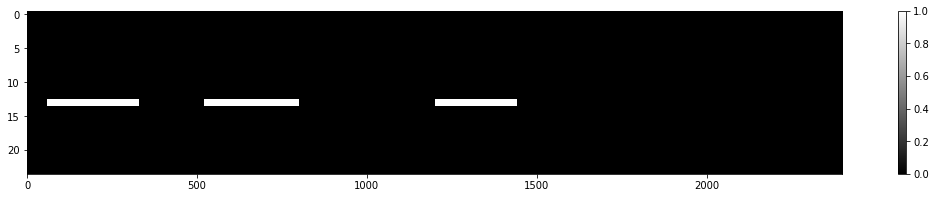

In [18]:
thresholded2 = np.zeros(thresholded.shape)
thresholded2[:, prelabeled_species_id] = thresholded[:, prelabeled_species_id]

plt.figure(figsize=(20,3))
plt.imshow(thresholded2.T, aspect=20, cmap="gray")
plt.colorbar()
plt.show()

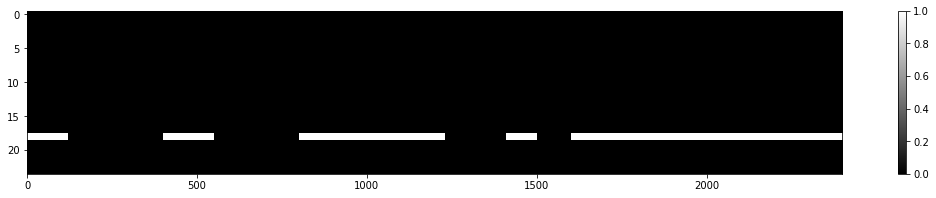

In [19]:
thresholded3 = np.zeros(thresholded.shape)

species_ranking = np.argsort(thresholded.sum(axis=0))[::-1]
# ranking1位がprelabelの種なら2位をtargetにする
if species_ranking[0] == prelabeled_species_id:
    species_id = species_ranking[1]
else:
    species_id = species_ranking[0]

thresholded3[:, species_id] = thresholded[:, species_id]

plt.figure(figsize=(20,3))
plt.imshow(thresholded3.T, aspect=20, cmap="gray")
plt.colorbar()
plt.show()

In [6]:
species_ranking = np.argsort(thresholded.sum(axis=0))[::-1]
species_ranking

array([18,  0, 13,  4, 12,  3, 21,  1,  8,  9,  2,  5,  6,  7, 23, 10, 22,
       14, 15, 16, 17, 19, 20, 11])

In [7]:
top5_species_id = species_ranking[:5]
top5_species_id

array([18,  0, 13,  4, 12])

In [8]:
prelabeled_species_id

13

In [26]:
prelabeled_species_id in top5_species_id

True

In [112]:
frame_length = framewise_output.shape[0]

In [115]:
audio_time = 60
estimated_event_list = []
for target_idx in range(thresholded.shape[1]):
    if thresholded[:, target_idx].mean() == 0:
        pass
    else:
        detected = np.argwhere(thresholded[:, target_idx]).reshape(-1)
        head_idx = 0
        tail_idx = 0
        while True:
            # 音声frameが一つのみ or 音声frameが一つ先のframeと途切れている場合
            if (tail_idx + 1 == len(detected)) or (detected[tail_idx + 1] - detected[tail_idx] != 1):
                t_min = detected[head_idx] * (audio_time/frame_length)
                t_max = detected[tail_idx] * (audio_time/frame_length)
                estimated_event = {
                    "audio_id": audio_id,
                    "species_id": target_idx,
                    "t_min": t_min.astype(np.float16),
                    "t_max": t_max.astype(np.float16),
                }
                estimated_event_list.append(estimated_event)
                head_idx = tail_idx + 1
                tail_idx = tail_idx + 1
                if head_idx >= len(detected):
                    break
            else:
                tail_idx += 1

In [116]:
estimated_event_list

[{'audio_id': '0a9cdd8a5', 'species_id': 0, 't_min': 20.0, 't_max': 29.97},
 {'audio_id': '0a9cdd8a5', 'species_id': 0, 't_min': 41.5, 't_max': 59.97},
 {'audio_id': '0a9cdd8a5', 'species_id': 1, 't_min': 22.25, 't_max': 23.72},
 {'audio_id': '0a9cdd8a5', 'species_id': 3, 't_min': 10.75, 't_max': 12.98},
 {'audio_id': '0a9cdd8a5', 'species_id': 3, 't_min': 20.0, 't_max': 22.97},
 {'audio_id': '0a9cdd8a5', 'species_id': 3, 't_min': 40.75, 't_max': 42.97},
 {'audio_id': '0a9cdd8a5', 'species_id': 3, 't_min': 50.0, 't_max': 52.97},
 {'audio_id': '0a9cdd8a5', 'species_id': 4, 't_min': 0.75, 't_max': 2.225},
 {'audio_id': '0a9cdd8a5', 'species_id': 4, 't_min': 10.75, 't_max': 13.73},
 {'audio_id': '0a9cdd8a5', 'species_id': 4, 't_min': 20.75, 't_max': 22.22},
 {'audio_id': '0a9cdd8a5', 'species_id': 4, 't_min': 26.0, 't_max': 26.72},
 {'audio_id': '0a9cdd8a5', 'species_id': 4, 't_min': 41.5, 't_max': 45.22},
 {'audio_id': '0a9cdd8a5', 'species_id': 4, 't_min': 50.0, 't_max': 52.22},
 {'audi

In [122]:
import pandas as pd
train_tp = pd.read_csv('../input/rfcx-species-audio-detection/train_tp.csv')
train_tp

,recording_id,species_id,songtype_id,t_min,f_min,t_max,f_max
0,003bec244,14,1,44.5440,2531.250,45.1307,5531.25
1,006ab765f,23,1,39.9615,7235.160,46.0452,11283.40
2,007f87ba2,12,1,39.1360,562.500,42.2720,3281.25
3,0099c367b,17,4,51.4206,1464.260,55.1996,4565.04
4,009b760e6,10,1,50.0854,947.461,52.5293,10852.70
...,...,...,...,...,...,...,...
1211,fe8d9ac40,13,1,53.4720,93.750,54.0960,843.75
1212,fea6b438a,4,1,43.5787,2531.250,45.7653,4031.25
1213,ff2eb9ce5,0,1,15.2267,5906.250,16.0213,8250.00
1214,ffb8d8391,5,1,14.3467,4781.250,16.6987,10406.20


In [125]:
train_tp.recording_id.nunique()

1132